##### Capstone Project — The Battle of Neighbourhoods

Introduction

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .
Questions that can be asked using the above mentioned datasets
What is best location in New Delhi City for Chinese Cuisine ?
Which areas have large number of Chinese Resturant Market ?
Which all areas have less number of resturant ?
Which is the best place to stay if I prefer Chinese Cuisine ?
What places are have best restaurant in New Delhi?
Data
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : Zomato kaggel dataset
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood.
Approach
Collect the new delhi city data from Zomato kaggel dataset
Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)

In [4]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

print('Libraries Installed.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries Installed.


###### Read the zomato resturant data from csv file

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [14]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

###### Data Cleaning
remove the unwanted columns and rows from dataset

In [15]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [16]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [17]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

###### created map to show the restaurant cluters

In [19]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [20]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

###### What places are have best restaurant in New Delhi?

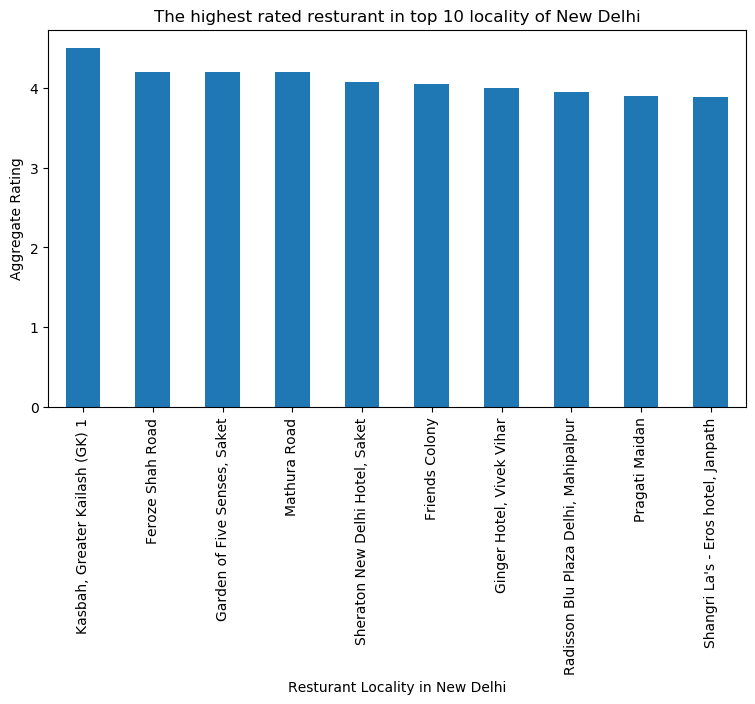

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in Kesbah, Greater Kailash area.

###### what places are have worst restaurants in New Delhi?

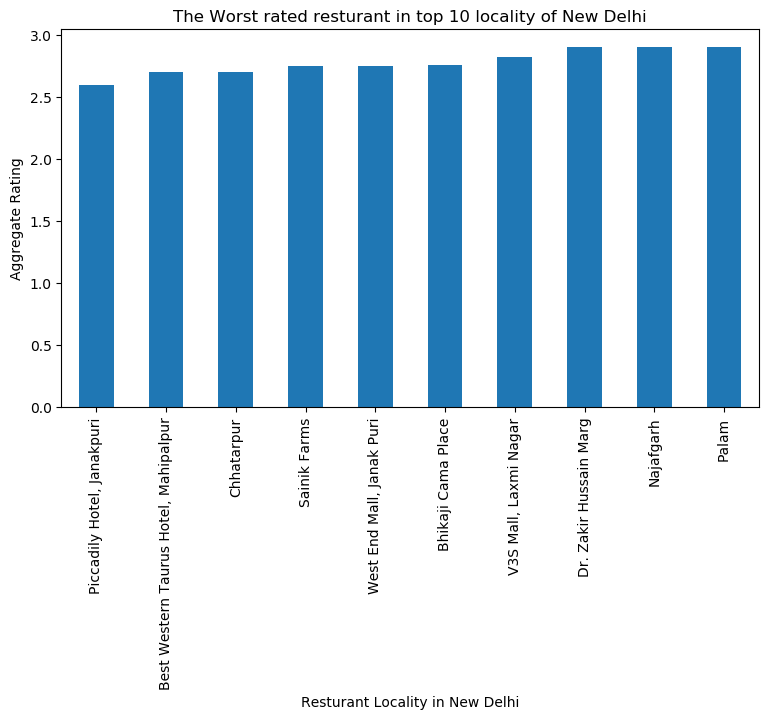

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in Piccadily Hotel, Janakpuri.

###### Which place are suitable for edible person in New Delhi city?

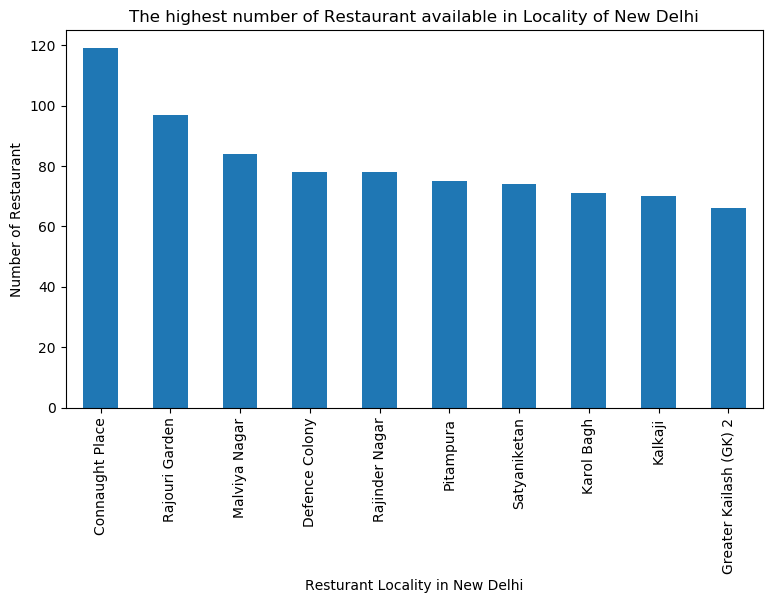

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Connaught Place is the best places for edible person to stay there.

###### Which place are not suitable for edible person in New Delhi city?

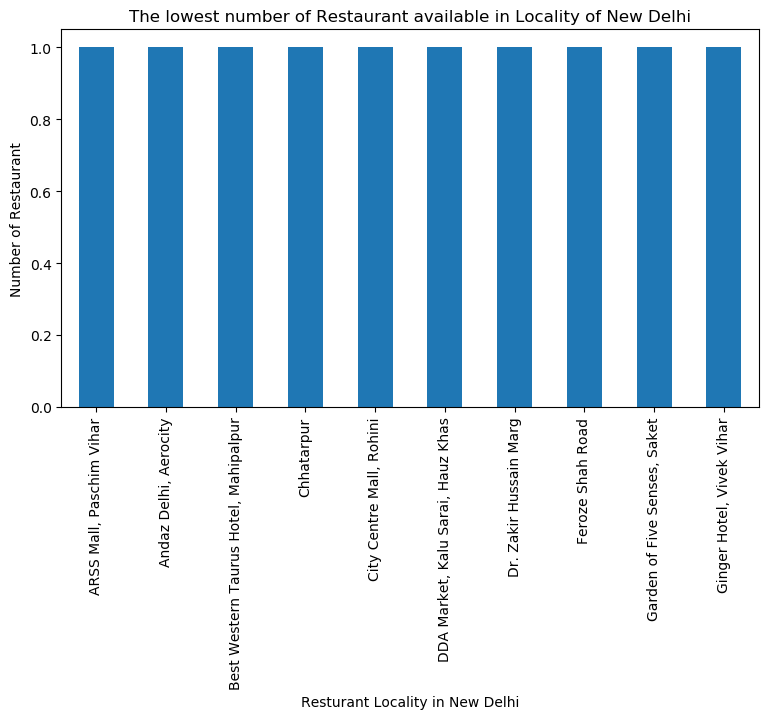

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

###### What are the best places for chinese restaurant in New Delhi city

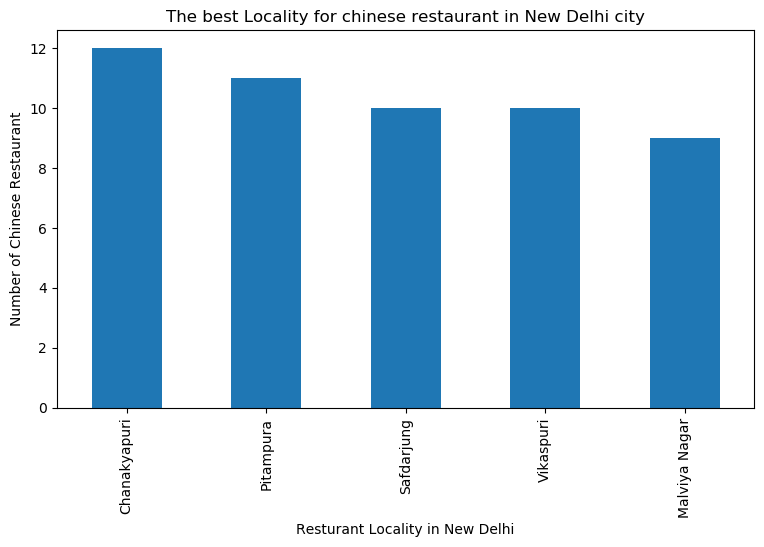

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Chanakyapuri is the best place for Chinese restaurant.

###### which places are the best chinese resturants in New Delhi?

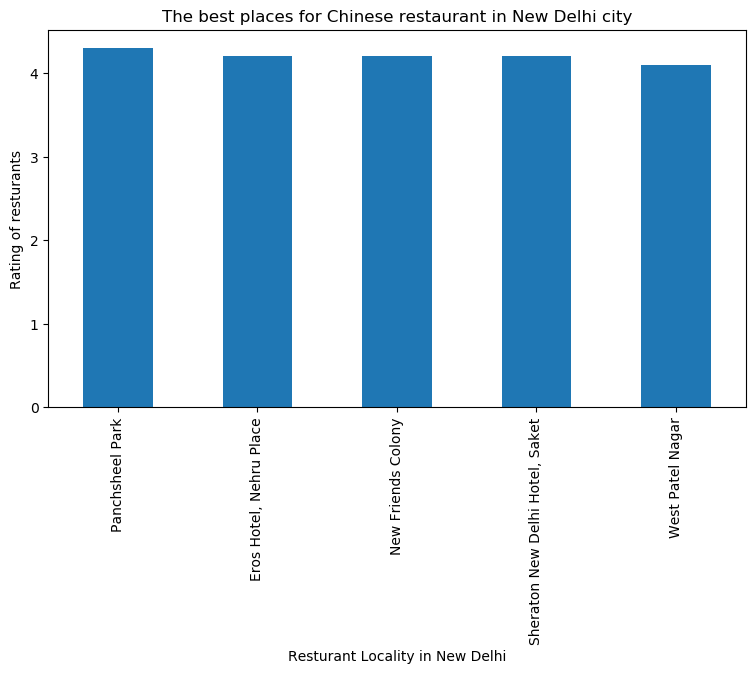

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Panchsheel park is best Chinese resturants.

##### Data transformation
Based on Locality grouping the data

In [28]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [29]:

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [30]:

df_final.shape

(240, 8)

###### Define Foursquare Credentials and Version

In [101]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'KQGAMAISIPOXFVVGVUMKMYLAV2342L3AU1RJZNAEBZSLE0WN' # Foursquare ID
CLIENT_SECRET = 'SSUIEW0FOMOOM43JYLSHYODVBW5IVF1KJJDVMWOZ401M1PJD' # Foursquare Secret
VERSION = '20210726' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KQGAMAISIPOXFVVGVUMKMYLAV2342L3AU1RJZNAEBZSLE0WN
CLIENT_SECRET:SSUIEW0FOMOOM43JYLSHYODVBW5IVF1KJJDVMWOZ401M1PJD


###### create a function to repeat the same process to all the Locality in New Delhi

In [102]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

###### find the venues in all New Delhi Locality

In [103]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [104]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [36]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         6                   6      6   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                6                   6      6   
Worldmark 1, Aerocity                          32                  32     32   
Yusuf Sarai                                    10                  10     10   
ibis New Delhi, Aerocity                       30                  30     30   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      6                6   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             6                6   
Worldmark 1, Aerocity                       32               32   
Yusuf Sarai                                 10               10   
ibis New Delhi, Aerocity                    30               30   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      6  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             6  
Worldmark 1, Aerocity                       32  
Yusuf Sarai                                 10  
ibis New Delhi, Aerocity                    30  

[238 rows x 6 columns]

In [37]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 210 uniques categories.


In [38]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  African Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                   0   
1  ARSS Mall, Paschim Vihar    0                  0                   0   
2  ARSS Mall, Paschim Vihar    0                  0                   0   
3  ARSS Mall, Paschim Vihar    0                  0                   0   
4  ARSS Mall, Paschim Vihar    0                  0                   0   

   Airport  Airport Food Court  Airport Lounge  Airport Service  \
0        0                   0               0                0   
1        0                   0               0                0   
2        0                   0               0                0   
3        0                   0               0                0   
4        0                   0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 211 columns]

In [39]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111            0.00000   
1                           Adchini  0.000000            0.00000   
2     Aditya Mega Mall, Karkardooma  0.000000            0.00000   
3                          Aerocity  0.000000            0.00000   
4     Aggarwal City Mall, Pitampura  0.000000            0.00000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000            0.00000   
234                West Patel Nagar  0.000000            0.00000   
235           Worldmark 1, Aerocity  0.000000            0.03125   
236                     Yusuf Sarai  0.000000            0.00000   
237        ibis New Delhi, Aerocity  0.000000            0.00000   

     African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0.0      0.0                 0.0        0.000000   
1                   0.0      0.0                 0.0        0.000000   
2                   0.0      0.0                 0.0        0.000000   
3                   0.0      0.0                 0.0        0.142857   
4                   0.0      0.0                 0.0        0.000000   
..                  ...      ...                 ...             ...   
233                 0.0      0.0                 0.0        0.000000   
234                 0.0      0.0                 0.0        0.000000   
235                 0.0      0.0                 0.0        0.000000   
236                 0.0      0.0                 0.0        0.000000   
237                 0.0      0.0                 0.0        0.000000   

     Airport Service  Airport Terminal  American Restaurant  ...  Trail  \
0                0.0          0.000000               0.0000  ...    0.0   
1                0.0          0.000000               0.0000  ...    0.0   
2                0.0          0.000000               0.0000  ...    0.0   
3                0.0          0.142857               0.0000  ...    0.0   
4                0.0          0.000000               0.0000  ...    0.0   
..               ...               ...                  ...  ...    ...   
233              0.0          0.000000               0.0625  ...    0.0   
234              0.0          0.000000               0.0000  ...    0.0   
235              0.0          0.000000               0.0000  ...    0.0   
236              0.0          0.000000               0.0000  ...    0.0   
237              0.0          0.000000               0.0000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
233       0.000000                 0.0               0.0   
234       0.000000                 0.0               0.0   
235       0.031250                 0.0               0.0   
236       0.000000                 0.0               0.0   
237       0.033333                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                            0.0                    0.0         0.0   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         

In [40]:
New_Delhi_grouped.shape

(238, 211)

In [41]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2         Coffee Shop  0.11
3         Pizza Place  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.33
1               Café  0.33
2                Pub  0.17
3         Restaurant  0.17
4                ATM  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2  Indian Restaurant   0.2
3      Shopping Mall   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1   Rental Car Location  0.14
2  Fast Food Restaurant  0.14
3        Airport Lounge  0.14
4           Coffee Shop  0.14


----Aggarwal City Mall, Pitampura----
              venue  freq
0  Department Store  0.25
1       Pizza Place  0.25
2        Donut Shop  0.25
3              Food  0.25
4            Office  0.00


----Aggarwal City Pl

In [132]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [133]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar              Pharmacy   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM                Market           Coffee Shop   
1                    Café                   Pub            Restaurant   
2       Indian Restaurant         Shopping Mall             Multiplex   
3    Fast Food Restaurant        Airport Lounge      Airport Terminal   
4              Donut Shop                  Food      Department Store   
..                    ...                   ...                   ...   
233     Indian Restaurant           Pizza Place                  Café   
234        Farmers Market     Indian Restaurant           Pizza Place   
235           Coffee Shop       Bed & Breakfast                   Spa   
236           Coffee Shop     Korean Restaurant                   Bar   
237           Coffee Shop             Hotel Bar                   Spa   

    5th Most Common Venue   6th Most Common Venue  \
0      Chinese Restaurant          Sandwich Place   
1           Women's Store          Farmers Market   
2                   Hotel                    Café   
3             Coffee Shop     Rental Car Location   
4    Fast Food Restaurant  Furniture / Home Store   
..                    ...                     ...   
233           Snack Place     American Restaurant   
234   Sporting Goods Shop    Fast Food Restaurant   
235             Hotel Bar    Gym / Fitness Center   
236   Japanese Restaurant        Asian Restaurant   
237  Gym / Fitness Center       Indian Restaurant   

              7th Most Common Venue 8th Most Common Venue  \
0    Multicuisine Indian Restaurant           Pizza Place   
1               Fried Chicken Joint     French Restaurant   
2                    Farmers Market     French Restaurant   
3                     Women's Store    Frozen Yogurt Shop   
4                Frozen Yogurt Shop   Fried Chicken Joint   
..                              ...                   ...   
233                          Garden             Multiplex   
234             Fried Chicken Joint     French Restaurant   
235               Indian Restaurant         Shopping Mall   
236                            Park                 Hotel   
237                   Shopping Mall            Restaurant   

    9th Most Common Venue 10th Most Common Venue  
0                   Hotel         Ice Cream Shop  
1              Food Truck             Food Court  
2              Food Truck             Food Court  
3     Fried Chicken Joint      French Restaurant  
4       French Restaurant             Food Truck  
..                    ...                    ...  
233            Hookah Bar                 Lounge  
234            Food Truck             Food Court  
235            Restaurant                 Bakery  
236            Food Court                   Food  
237       Bed & Breakfast                 Bakery  

[238 rows x 11 columns]

In [134]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape
New_Delhi_clustering.head()

ATM  Accessories Store  African Restaurant  Airport  \
0  0.111111                0.0                 0.0      0.0   
1  0.000000                0.0                 0.0      0.0   
2  0.000000                0.0                 0.0      0.0   
3  0.000000                0.0                 0.0      0.0   
4  0.000000                0.0                 0.0      0.0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                 0.0        0.000000              0.0          0.000000   
1                 0.0        0.000000              0.0          0.000000   
2                 0.0        0.000000              0.0          0.000000   
3                 0.0        0.142857              0.0          0.142857   
4                 0.0        0.000000              0.0          0.000000   

   American Restaurant  Arcade  ...  Trail  Train Station  Turkish Restaurant  \
0                  0.0     0.0  ...    0.0            0.0                 0.0   
1                  0.0     0.0  ...    0.0            0.0                 0.0   
2                  0.0     0.0  ...    0.0            0.0                 0.0   
3                  0.0     0.0  ...    0.0            0.0                 0.0   
4                  0.0     0.0  ...    0.0            0.0                 0.0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0               0.0                            0.0                    0.0   
1               0.0                            0.0                    0.0   
2               0.0                            0.0                    0.0   
3               0.0                            0.0                    0.0   
4               0.0                            0.0                    0.0   

   Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0         0.0       0.0          0.0            0.0  
1         0.0       0.0          0.0            0.0  
2         0.0       0.0          0.0            0.0  
3         0.0       0.0          0.0            0.0  
4         0.0       0.0          0.0            0.0  

[5 rows x 210 columns]